### Prediction of the Strength of Concrete By The Use of XGBoost
Concrete has been around for ages, way back to ancient civilization. It has always been an important ingredient for construction. This is due to its strength and durability. The quality of a concrete is mostly based on its strength. There are different types of concrete strenght but our focus for this project is **Concrete Compressive Strenght**.

**Concrete Compressive Strenght:**  is a widely accepted measure to access the performance of a given concrete mixture. It determines how well concrete can withstand loads that affect size. Usually compressive strength of concrete varies from 2500psi(17mpa) to 4000psi(28mpa) and higher in residential and commericial structures.("What is the standard strenght of concrete?", https://bigdreadymix.com)

#### Dataset
**Source:** 

Original Owner and DonorProf. I-Cheng YehDepartment of Information Management Chung-Hua University, Hsin Chu, Taiwan 30067, R.O.C.

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and
Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

##### Attributes
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name|Data Type|Measurement|Description
----|---------|-----------|-----------
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

#### Objective
Build a model to predict the compressive strenght of concrete.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import the dataset using pandas read_csv>
df=pd.read_csv('/Users/apple/Downloads/Concrete_Data.csv')
display(df)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
#change column headers for easy data processing
new_columns=[['cement','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate','age','concrete_compressive_strength']]
df.columns=new_columns
display(df)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Understandng the data

In [6]:
#check for missing values
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [7]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


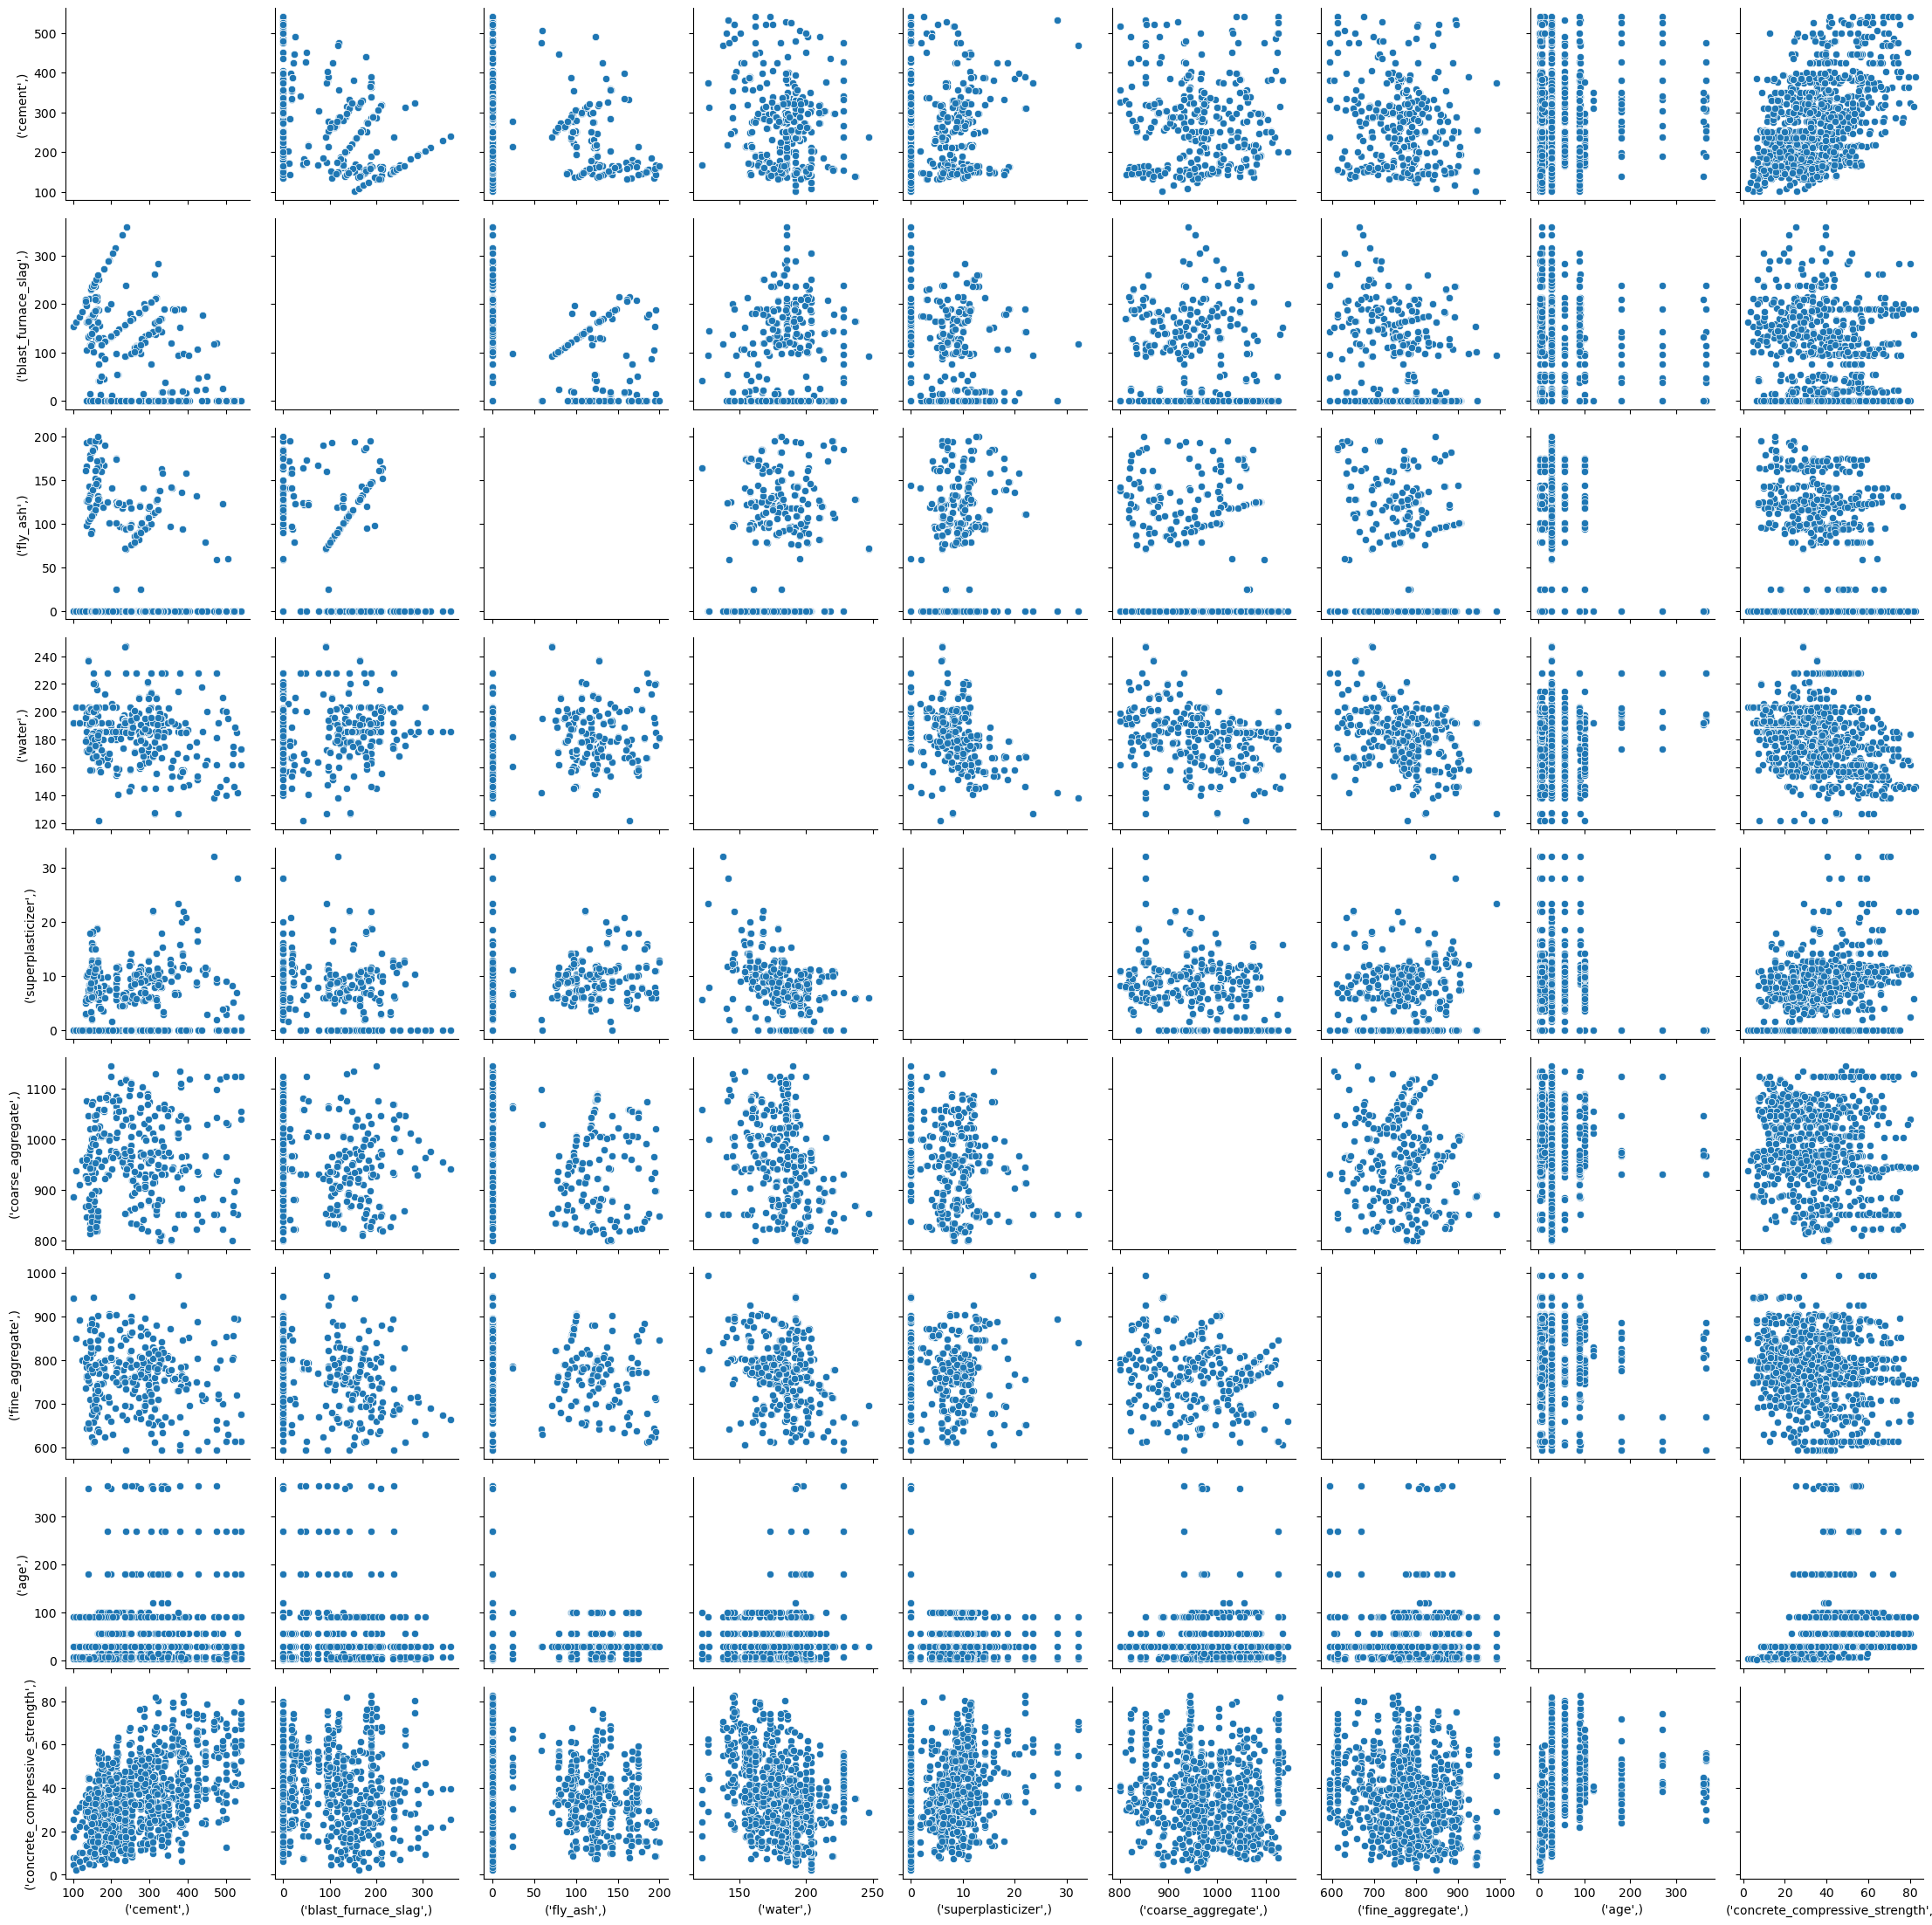

In [9]:
#distribution of data
g = sns.PairGrid(df)
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot) 

In [10]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


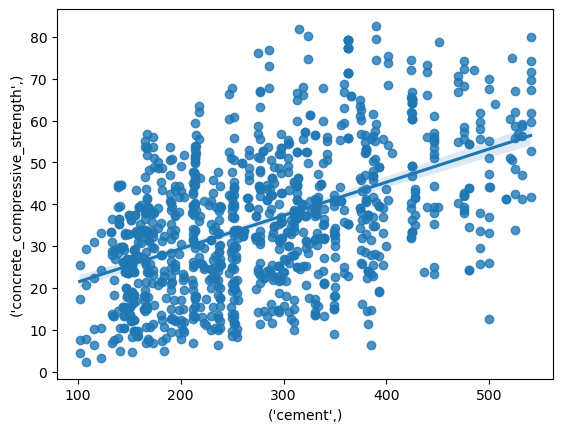

In [11]:
# Relationship between cement and compressive concrete strength(CCS)
sns.regplot(x='cement', y='concrete_compressive_strength', data=df)
plt.show()

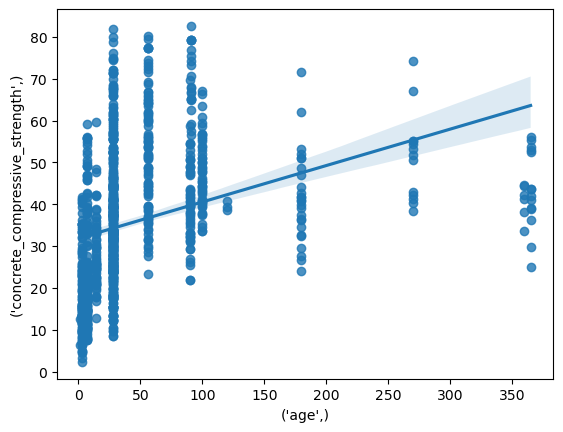

In [18]:
# Relationship between age and compressive concrete strength(CCS)
sns.regplot(x='age', y='concrete_compressive_strength', data=df)
plt.show()

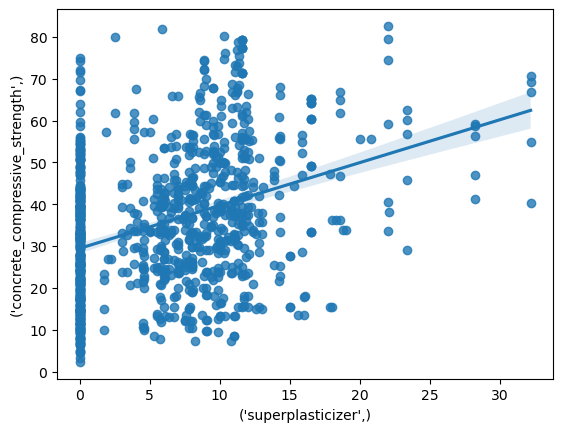

In [19]:
# Relationship between superplasticizer and compressive concrete strength(CCS)
sns.regplot(x='superplasticizer', y='concrete_compressive_strength', data=df)
plt.show()

#### Insights

* All features(input variables) in the dataset are independent and show no correlation with one another.

* The cement feature shows slight collinear relationship with the dependent/output variable(CCS). This suggests that cement is an essential ingredient in testing for the strength of concrete.

#### Data Preprocessing

In [27]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=df.drop('concrete_compressive_strength', axis=1)
y=df['concrete_compressive_strength']
x_scaled=scale.fit_transform(x)
x_scaled

/var/folders/hx/t08gll7d25sdf1mq6bc339y00000gn/T/ipykernel_34903/4013587396.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x=df.drop('concrete_compressive_strength', axis=1)


array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [28]:
#split dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2,  random_state=1)

#### Model

In [51]:
# functions to train and test accuracy of the model
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"Testing accuracy of {model_name} is {model.score(X_test,y_test)}")

In [63]:
# Building and training XGBoost model 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# A parameter grid for xgboost
params={
    'min_child_weight':[1,5,10],
    'gamma':[0.5,1,1.5,2,5],
    'subsample':[0.6,0.8,1.0],
    'colsample_bytree':[0.6,0.8,1.0],
    'max_depth':[3,4,5]
}
xgb=XGBRegressor()
xgb_cv=GridSearchCV(xgb, param_grid=params, cv=10)

In [40]:
train(xgb_cv, 'xgbregressor')

Training accuracy of xgbregressor is 0.9869607950072022
Testing accuracy of xgbregressor is 0.9118590501246736


In [49]:
print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 1.0}


In [54]:
model=XGBRegressor(colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
yhat=model.predict(X_test)

In [64]:
r2_score(y_test, yhat)

0.9118590501246736

#### Feature Importance

Feature: 0, Score: 0.20078
Feature: 1, Score: 0.03955
Feature: 2, Score: 0.12384
Feature: 3, Score: 0.12311
Feature: 4, Score: 0.04769
Feature: 5, Score: 0.01774
Feature: 6, Score: 0.05238
Feature: 7, Score: 0.39490


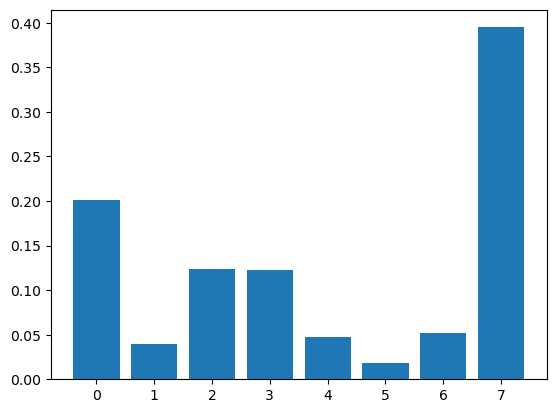

In [72]:
# get importance
importance=model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Conclusion

* The model xgboost predicted teh output variables with an accuracy of 91.2%.

* Feature importance shows that the input variables (**cement and age**) are the most important input variable when predicting the compressive strength of a concrete.

* The input variables (**blast furnace slag and coarse aggregate**) are the least input variable when predicting the compressive strength of a concrete.

